## Decision Tree 

    * Rule Based Classification Engine
    * sorting of class based on particular condition 
    
    * Gini Impurity = 1-(sum of sq of all probabilities)
    * Entropy - sum of (weightage * gini impurity)
    
    * when to stop while creating DT :
        * when impurity =0
        * no of sample points <= 5
        * ht of tree <=10
        * leafs should not cross 1000

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

In [2]:
# importing DT Lib

from sklearn.tree import DecisionTreeClassifier # to create the model

from sklearn import tree  # to plot the Tree plot

from sklearn.metrics import classification_report


In [3]:
from sklearn import datasets

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

In [4]:
iris = sns.load_dataset('iris')

In [5]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
# converting the species column class - in 1,2,3 numerical

label = LabelEncoder()

iris['species'] = label.fit_transform(iris['species'])

In [7]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
x = iris.iloc[:,0:-1]
y = iris['species']

In [9]:
# random state - same training data alloted to random_state=40

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=40)

In [10]:
iris['species'].unique()

array([0, 1, 2])

In [11]:
iris['species'].value_counts()

0    50
1    50
2    50
Name: species, dtype: int64

In [ ]:
# DATA IS BALANCED

### Building Decision Tree Classifier (CART) using Gini Criteria

In [12]:
# form of model
model_gini = DecisionTreeClassifier(criterion='gini',min_samples_split=5,max_depth=4)

In [13]:
# fitting in the model
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4, min_samples_split=5)

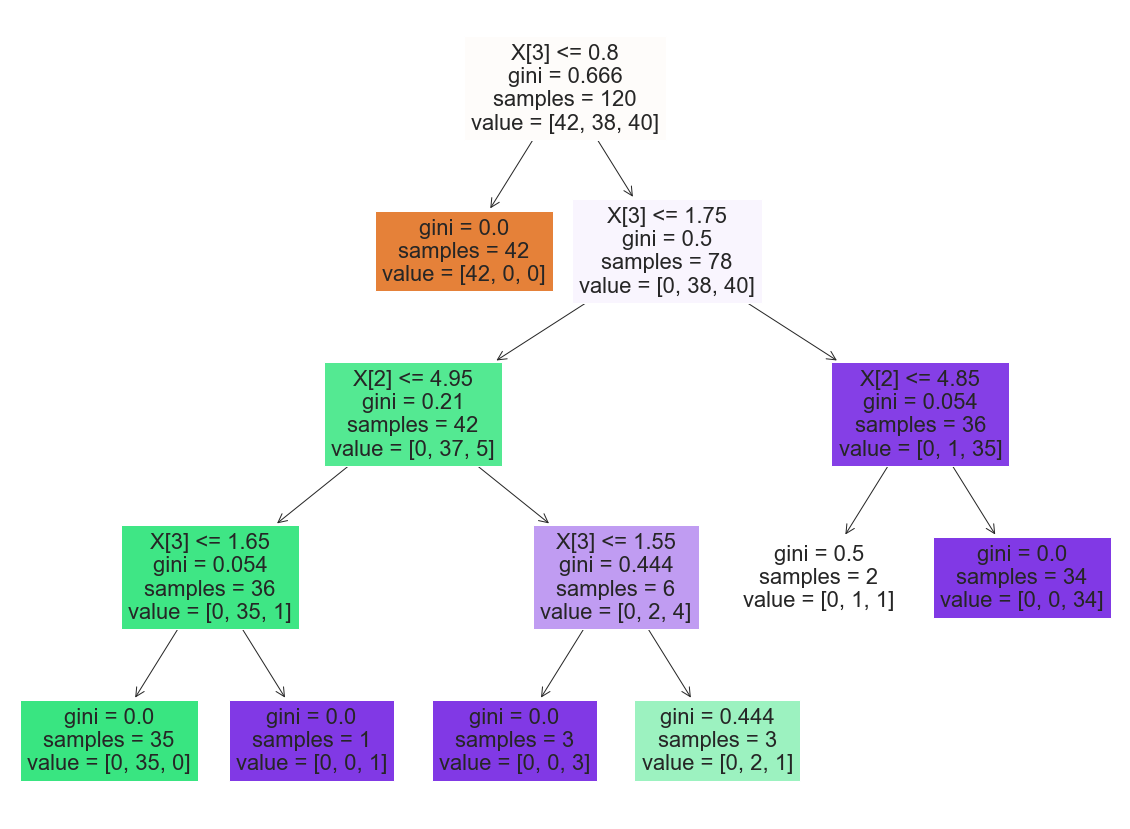

In [14]:
#PLot the decision tree
plt.figure(figsize=(20,15))
tree.plot_tree(model_gini,filled=True);

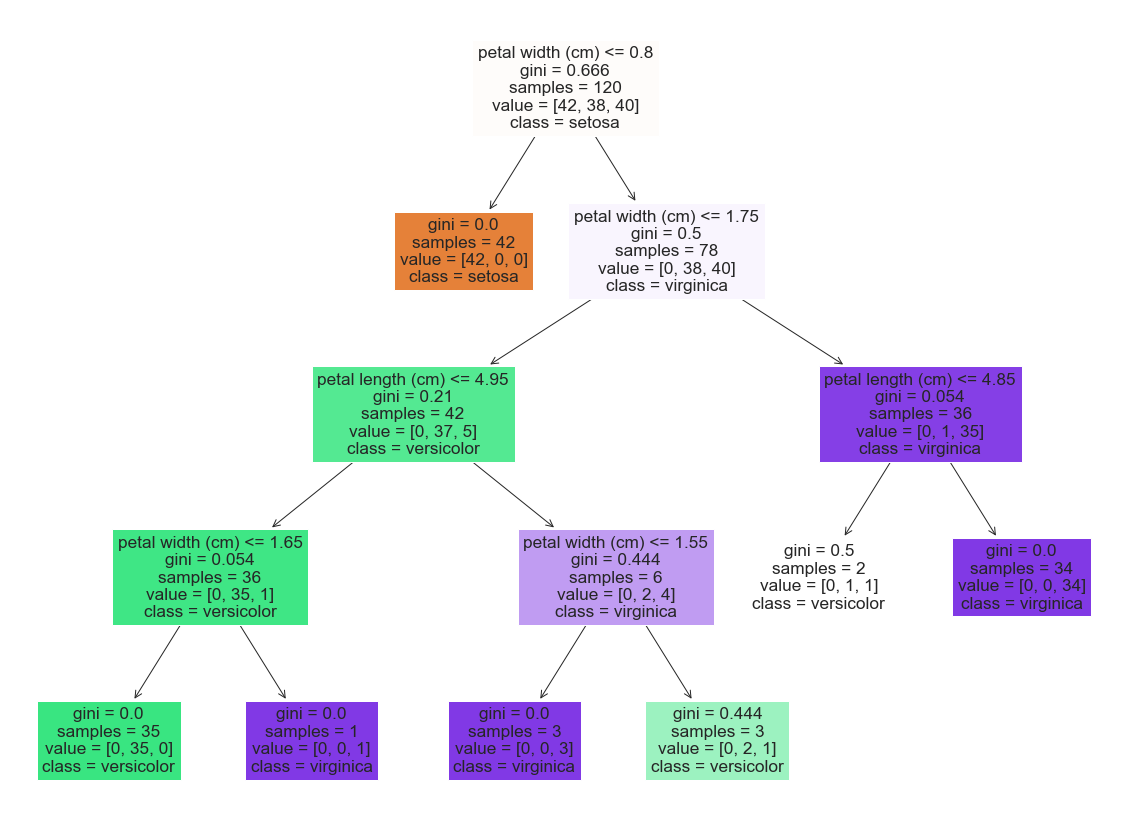

In [16]:
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']

plt.figure(figsize=(20,15))
tree.plot_tree(model_gini,feature_names=fn,class_names=cn,filled=True);

In [17]:
# calculating accuracy on Training Data

pred_train = model_gini.predict(x_train)
gini_acc_train = metrics.accuracy_score(y_train,pred_train)

print(f'Accuracy on Training Data is {np.round(gini_acc_train,4)*100} % ')

Accuracy on Training Data is 98.33 % 


In [18]:
# calculating accuracy on Testing Data

pred_test = model_gini.predict(x_test)

gini_acc_test = metrics.accuracy_score(y_test,pred_test)

print(f'Accuracy on Testing Data is {np.round(gini_acc_test,4)*100} % ')

Accuracy on Testing Data is 96.67 % 


In [ ]:
## from above we can observe the Accuracy over training & testing is very close
# model is good

### Building Decision Tree Classifier using Entropy Criteria

In [19]:
# form of model
model_entropy = DecisionTreeClassifier(max_depth=3,criterion='entropy')

In [20]:
# fitting the data
model_entropy.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

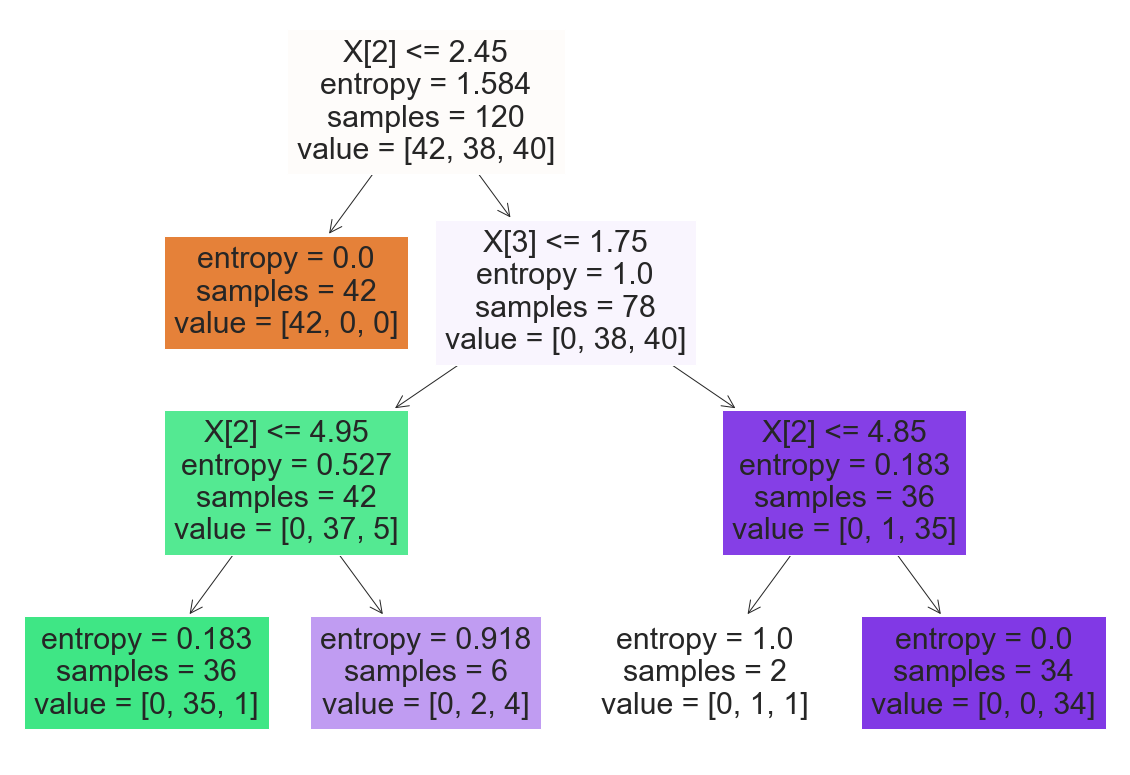

In [21]:
# ploting the tree
plt.figure(figsize=(20,14))

tree.plot_tree(model_entropy,filled=True);

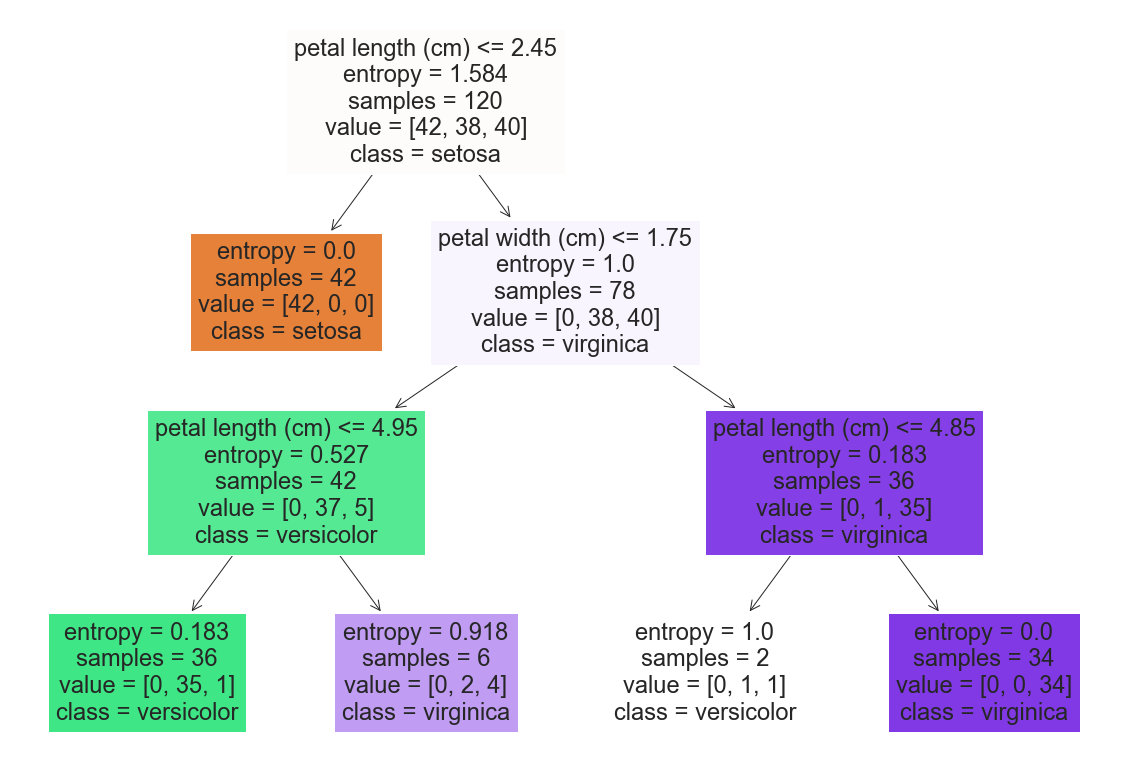

In [22]:
# ploting the tree
plt.figure(figsize=(20,14))

tree.plot_tree(model_entropy,class_names=cn,feature_names=fn,filled=True);

In [23]:
# finding the accuracy on Training data

pred_entropy_train = model_entropy.predict(x_train)

entropy_acc_train = metrics.accuracy_score(y_train,pred_entropy_train)

print(f'Accuracy on Training Data is {np.round(entropy_acc_train,4)*100} % ')

Accuracy on Training Data is 96.67 % 


In [24]:
# finding the accuracy on Testing data

pred_entropy_test = model_entropy.predict(x_test)

entropy_acc_test = metrics.accuracy_score(y_test,pred_entropy_test)

print(f'Accuracy on Testing Data is {np.round(entropy_acc_test,4)*100} % ')

Accuracy on Testing Data is 96.67 % 


In [ ]:
## model is good since the accuracy of Training & testing is same

# Decision Tree Regression Example

In [25]:
# Decision Tree Regression

from sklearn.tree import DecisionTreeRegressor


In [26]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [28]:
X = iris.iloc[:,0:3]
Y = iris.iloc[:,3]

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33,shuffle=True, random_state=1)

In [32]:
model_reg = DecisionTreeRegressor(max_depth=3)
model_reg.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=3)

In [34]:
# finding the Mean Squared error on Training data

pred_reg_train = model_reg.predict(X_train)

reg_mse_train = metrics.mean_squared_error(Y_train,pred_reg_train)

print(f'Mean Squared error on Training Data is {np.round(reg_mse_train,4)*100} % ')

Mean Squared error on Training Data is 3.16 % 


In [35]:
# finding the Mean Squared error on Testing data

pred_reg_test = model_reg.predict(X_test)

reg_mse_test = metrics.mean_squared_error(Y_test,pred_reg_test)

print(f'Mean Squared error on Testing Data is {np.round(reg_mse_test,4)*100} % ')

Mean Squared error on Testing Data is 3.92 % 


In [36]:
# finding the Mean ABS % error on Testing data

reg_abs_test = metrics.mean_absolute_percentage_error(Y_test,pred_reg_test)

print(f'Mean Abs % error on Testing Data is {np.round(reg_abs_test,4)*100} % ')

Mean Abs % error on Testing Data is 13.919999999999998 % 


In [37]:
np.mean(np.abs(Y_test - pred_reg_test)/np.array(Y_test))

0.1392255406795081

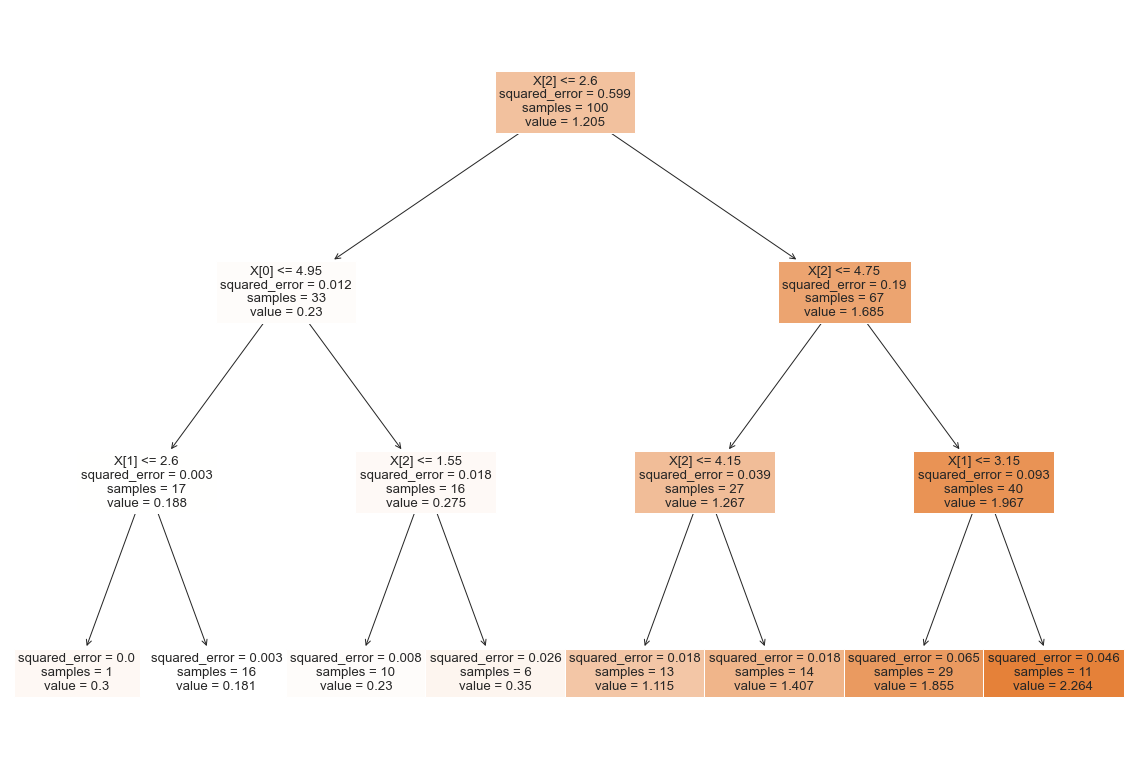

In [38]:
# ploting the tree
plt.figure(figsize=(20,14))

tree.plot_tree(model_reg,filled=True);

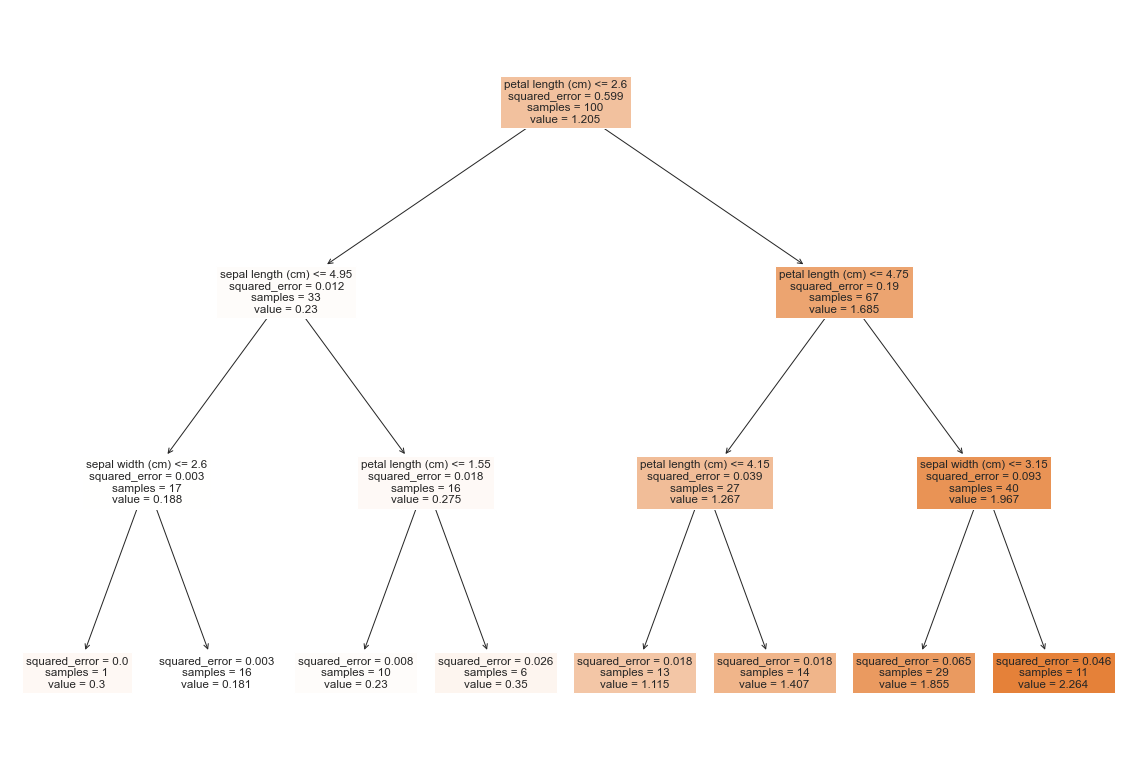

In [39]:
# ploting the tree
plt.figure(figsize=(20,14))

tree.plot_tree(model_reg,class_names=cn,feature_names=fn,filled=True);